#Data Preparation


### Data Source & Description

#### Kaggle Data Source
https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews/data

**About Dataset**

This dataset was collected via Python scraper in March 2023 and contains:

information about all beauty products (over 8,000) from the Sephora online store, including product and brand names, prices, ingredients, ratings, and all features.
user reviews (about 1 million on over 2,000 products) of all products from the Skincare category, including user appearances, and review ratings by other users

#### Dataset Name: Products
Target Variable:
* loves_count: The number of people who have marked this product as a favorite

#### Other Attributes Information
* product_id: The unique identifier for the product from the site
* product_name: The full name of the product
* brand_id: The unique identifier for the product brand from the site
* brand_name: The full name of the product brand (categorical)
* rating: The average rating of the product based on user reviews (continuous)
* reviews: The number of user reviews for the product (continuous)
* size: The size of the product, which may be in oz, ml, g, packs, or other units depending on the product type
* variation_type: The type of variation parameter for the product (e.g. Size, Color)
* variation_value: The specific value of the variation parameter for the product (e.g. 100 mL, Golden Sand)
* variation_desc: A description of the variation parameter for the product (e.g. tone for fairest skin)
* ingredients: A list of ingredients included in the product, for example: [‘Product variation 1:’, ‘Water, Glycerin’, ‘Product variation 2:’, ‘Talc, Mica’] or if no variations [‘Water, Glycerin’]
* price_usd: The price of the product in US dollars
* value_price_usd: The potential cost savings of the product, presented on the site next to the regular price
* sale_price_usd: The sale price of the product in US dollars
* limited_edition: Indicates whether the product is a limited edition or not (1-true, 0-false)  
* new: Indicates whether the product is new or not (1-true, 0-false)
* online_only: Indicates whether the product is only sold online or not (1-true, 0-false)  
* out_of_stock: Indicates whether the product is currently out of stock or not (1 if true, 0 if false)  
* sephora_exclusive: Indicates whether the product is exclusive to Sephora or not (1 if true, 0 if false)  
* highlights: A list of tags or features that highlight the product's attributes (e.g. [‘Vegan’, ‘Matte Finish’])
* primary_category: First category in the breadcrumb section
* secondary_category: Second category in the breadcrumb section
* tertiary_category: Third category in the breadcrumb section
* child_count: The number of variations of the product available  
* child_max_price: The highest price among the variations of the product
* child_min_price: The lowest price among the variations of the product

#### Objective
To identify the key factors driving high loves_count within each product category, enabling the marketing strategy team to make more informed decisions—such as implementing bundle sales, cross-selling opportunities, and other targeted promotional tactics.

### Libraries & Loading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df_product = pd.read_csv('product_info.csv')

### Data Description

In [3]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [4]:
missing_values = df_product.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    missing_percentage = (missing_values / len(df_product)) * 100
    missing_info = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage (%)': missing_percentage})
    missing_info = missing_info.sort_values(by='Missing Percentage (%)', ascending=False)
    print("Columns with Missing Values:")
    display(missing_info)
else:
    print("No missing values found in the DataFrame.")

Columns with Missing Values:


,Missing Count,Missing Percentage (%)
sale_price_usd,8224,96.821286
value_price_usd,8043,94.690370
variation_desc,7244,85.283730
child_max_price,5740,67.577113
child_min_price,5740,67.577113
highlights,2207,25.983047
size,1631,19.201789
variation_value,1598,18.813280
variation_type,1444,17.000235
tertiary_category,990,11.655286


In [5]:
df_product.describe()

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


In [6]:
print ("Rows     : " ,df_product.shape[0])
print ("Columns  : " ,df_product.shape[1])
print ("\nFeatures : \n" ,df_product.columns.tolist())
print ("\nMissing values :  ", df_product.isnull().sum().values.sum())
print ("\nUnique values :  \n",df_product.nunique())

Rows     :  8494
Columns  :  27

Features : 
 ['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count', 'rating', 'reviews', 'size', 'variation_type', 'variation_value', 'variation_desc', 'ingredients', 'price_usd', 'value_price_usd', 'sale_price_usd', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category', 'secondary_category', 'tertiary_category', 'child_count', 'child_max_price', 'child_min_price']

Missing values :   44370

Unique values :  
 product_id            8494
product_name          8415
brand_id               304
brand_name             304
loves_count           7436
rating                4394
reviews               1556
size                  2055
variation_type           7
variation_value       2729
variation_desc         935
ingredients           6538
price_usd              298
value_price_usd        174
sale_price_usd          88
limited_edition          2
new                      2
online_only         

In [7]:
categorical_cols = df_product.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Number of unique values: {df_product[col].nunique()}")
    print(f"Unique values: {df_product[col].unique()}")
    print("-" * 30)

Column: product_id
Number of unique values: 8494
Unique values: ['P473671' 'P473668' 'P473662' ... 'P504428' 'P504448' 'P505461']
------------------------------
Column: product_name
Number of unique values: 8415
Unique values: ['Fragrance Discovery Set' 'La Habana Eau de Parfum'
 'Rainbow Bar Eau de Parfum' ... 'Mon Paris Eau de Parfum Gift Set'
 'Y Eau de Parfum Gift Set'
 'Candy Glaze Lip Gloss Stick Duo with Hyaluronic Acid']
------------------------------
Column: brand_name
Number of unique values: 304
Unique values: ['19-69' '54 Thrones' 'ABBOTT' 'Acqua di Parma' 'adwoa beauty' 'AERIN'
 'Algenist' 'Alpha-H' 'alpyn beauty' 'ALTERNA Haircare' 'Ami Colé' 'amika'
 'Anastasia Beverly Hills' 'Aquis' 'Armani Beauty' 'Artist Couture'
 'Atelier Cologne' 'Augustinus Bader' 'Azzaro' 'bareMinerals' 'BeautyBio'
 'beautyblender' 'belif' 'Benefit Cosmetics' 'BERDOUES' 'Bio Ionic'
 'Biossance' 'Blinc' 'Bobbi Brown' 'Bon Parfumeur' 'BondiBoost'
 'Boy Smells' 'BREAD BEAUTY SUPPLY' 'Briogeo' 'Bumble

In [8]:
primary_cat_counts = df_product['primary_category'].value_counts()
primary_cat_percentages = df_product['primary_category'].value_counts(normalize=True) * 100

primary_cat_distribution = pd.DataFrame({
    'Count': primary_cat_counts,
    'Percentage': primary_cat_percentages
})

print("Primary Category Distribution:")
print(primary_cat_distribution)

Primary Category Distribution:
                  Count  Percentage
primary_category                   
Skincare           2420   28.490699
Makeup             2369   27.890275
Hair               1464   17.235696
Fragrance          1432   16.858959
Bath & Body         405    4.768072
Mini Size           288    3.390629
Men                  60    0.706381
Tools & Brushes      52    0.612197
Gifts                 4    0.047092


In [9]:
for primary_cat in df_product['primary_category'].unique():
    print(f"Primary Category: {primary_cat}")
    secondary_cat_counts = df_product[df_product['primary_category'] == primary_cat]['secondary_category'].value_counts()
    secondary_cat_percentages = df_product[df_product['primary_category'] == primary_cat]['secondary_category'].value_counts(normalize=True) * 100

    secondary_cat_distribution = pd.DataFrame({
        'Count': secondary_cat_counts,
        'Percentage': secondary_cat_percentages
    })

    print(secondary_cat_distribution)
    print("-" * 30)

Primary Category: Fragrance
                       Count  Percentage
secondary_category                      
Women                    875   61.188811
Candles & Home Scents    262   18.321678
Value & Gift Sets        155   10.839161
Men                      135    9.440559
Mini Size                  3    0.209790
------------------------------
Primary Category: Bath & Body
                       Count  Percentage
secondary_category                      
Body Moisturizers        220   54.320988
Bath & Shower             84   20.740741
Body Care                 69   17.037037
Self Tanners              11    2.716049
Value & Gift Sets         10    2.469136
Mini Size                  7    1.728395
Beauty Supplements         2    0.493827
Candles & Home Scents      1    0.246914
Sunscreen                  1    0.246914
------------------------------
Primary Category: Mini Size
                    Count  Percentage
secondary_category                   
Makeup                137   47.735192


In [10]:
secondary_to_primary = df_product.groupby('secondary_category')['primary_category'].unique()
print("Distinct Primary Categories for each Secondary Category:")
print(secondary_to_primary)

Distinct Primary Categories for each Secondary Category:
secondary_category
Accessories                                                           [Makeup]
Bath & Body                                                        [Mini Size]
Bath & Shower                                                    [Bath & Body]
Beauty Accessories                                           [Tools & Brushes]
Beauty Supplements                                               [Bath & Body]
Beauty Tools                                                 [Tools & Brushes]
Body Care                                                        [Bath & Body]
Body Moisturizers                                                [Bath & Body]
Brushes & Applicators                                [Makeup, Tools & Brushes]
Candles & Home Scents                                 [Fragrance, Bath & Body]
Cheek                                                                 [Makeup]
Cleansers                                              

### Data Cleaning and Correction

#### Cleaning up from the primary_category level first
* "Mini Size" existed as secondary_category in other categories e.g. Makeup. And the secondary_category except "Value & Gift Sets" is actually same as other primary_category. Henceforth, I have swopped the primary_category and secondary_category of these products.
  * "Fragrance" goes under "Fragrance" -> "Mini Size"
  * "Skincare" goes under "Skincare" -> "Mini Size"
  * "Hair" goes under "Hair" -> "Mini Size"
  * "Makeup" goes under "Makeup" -> "Mini Size"
  * "Bath & Body" goes under "Bath & Body" -> "Mini Size"
  * "Value & Gift Sets" is also a secondary_category under the other main primary_category. Unlike the rest where I can infer from secondary_category, as there are only 6 records, I decide to print out the records to determine the category.

* "Tools & Brushes" are subset of the "Hair" and "Makeup" base on domain knowledge hence re-categorizing accordingly
   * "Hair Tools" goes under "Hair" -> "Tools"
   * "Brushes & Applicators" goes under "Makeup" -> "Brushes & Applicators"
   * "Beauty Tools" and "Beauty Accessories" goes under "Makeup" -> "Accessories"

* "Men" has limited and low engagement, inclusion of this category may introduce noise due to sparse data, likely to consider to drop this to focus on core consumer segments e.g. women buyers

* "Gifts" refers to giftcards or store credits, as these are intermediary financial instruments and not physical products with attributes like size, brand, category, it does not reflect product desirability, hence will drop this since it does not align with the objective.

In [11]:
# Swap primary and secondary categories for 'Mini Size' excluding 'Value & Gift Sets'
mask = (df_product['primary_category'] == 'Mini Size') & (df_product['secondary_category'] != 'Value & Gift Sets')
df_product.loc[mask, ['primary_category', 'secondary_category']] = df_product.loc[mask, ['secondary_category', 'primary_category']].values

In [12]:
mini_size_gift_sets_df = df_product[(df_product['primary_category'] == 'Mini Size') & (df_product['secondary_category'] == 'Value & Gift Sets')]
display(mini_size_gift_sets_df)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
581,P502233,Mini Roller Express Curling Mascara & Liquid E...,5333,Benefit Cosmetics,7264,4.600,5.0,NaN,NaN,NaN,...,1,1,0,"['Volumizing', 'Long-wearing']",Mini Size,Value & Gift Sets,NaN,0,NaN,NaN
595,P505033,Mini The POREfessional Package Deal pore prime...,5333,Benefit Cosmetics,539,NaN,NaN,NaN,NaN,NaN,...,0,0,0,"['Liquid Formula', 'Good for: Pores']",Mini Size,Value & Gift Sets,NaN,0,NaN,NaN
3813,P502307,Mini Blush & Bloom Cheek and Lip Tint Set,6254,Jouer Cosmetics,5122,3.500,4.0,NaN,NaN,NaN,...,1,0,0,"['Vegan', 'Stick Formula', 'Hydrating', 'Matte...",Mini Size,Value & Gift Sets,NaN,0,NaN,NaN
5291,P503582,Mini Shine On Dolce Vita Lip Duo Set,3976,NARS,18880,4.625,8.0,NaN,NaN,NaN,...,0,1,0,"['High Shine Finish', 'Matte Finish', 'Without...",Mini Size,Value & Gift Sets,NaN,0,NaN,NaN
7887,P502503,Mini Secret Santa Eyeshadow Palette,4225,Too Faced,15161,4.200,10.0,NaN,NaN,NaN,...,1,1,0,"['Pressed Powder Formula', 'Metallic Finish', ...",Mini Size,Value & Gift Sets,NaN,0,NaN,NaN
8327,P477455,Mini Decorative Tin Trio,6245,VOLUSPA,1048,2.500,2.0,NaN,NaN,NaN,...,0,1,1,"['Vegan', 'Without Phthalates', 'Without Parab...",Mini Size,Value & Gift Sets,NaN,0,NaN,NaN


In [13]:
# Change categories for index 8327
df_product.loc[8327, 'primary_category'] = 'Fragrance'

# Change categories for the rest of the 'Value & Gift Sets' records (excluding index 8327)
mask = (df_product['primary_category'] == 'Mini Size') & (df_product['secondary_category'] == 'Value & Gift Sets') & (df_product.index != 8327)
df_product.loc[mask, 'primary_category'] = 'Makeup'

In [14]:
# Change categories for 'Tools & Brushes' primary_category and 'Hair Tools' secondary_category
mask = (df_product['primary_category'] == 'Tools & Brushes') & (df_product['secondary_category'] == 'Hair Tools')
df_product.loc[mask, 'primary_category'] = 'Hair'
df_product.loc[mask, 'secondary_category'] = 'Tools'

# Change categories for 'Tools & Brushes' primary_category and 'Brushes & Applicators' secondary_category
mask = (df_product['primary_category'] == 'Tools & Brushes') & (df_product['secondary_category'] == 'Brushes & Applicators')
df_product.loc[mask, 'primary_category'] = 'Makeup'

# Change categories for 'Tools & Brushes' primary_category and 'Beauty Tools' secondary_category
mask = (df_product['primary_category'] == 'Tools & Brushes') & (df_product['secondary_category'] == 'Beauty Tools')
df_product.loc[mask, 'primary_category'] = 'Makeup'
df_product.loc[mask, 'secondary_category'] = 'Accessories'

# Change categories for 'Tools & Brushes' primary_category and 'Beauty Accessories' secondary_category
mask = (df_product['primary_category'] == 'Tools & Brushes') & (df_product['secondary_category'] == 'Beauty Accessories')
df_product.loc[mask, 'primary_category'] = 'Makeup'
df_product.loc[mask, 'secondary_category'] = 'Accessories'

#### Cleaning up from the secondary_category level

* Under "Bath & Body" primary_category, noticed there are some secondary_category records more suitable to be categorize under another primary_category henceforth recategorize them accordingly.

* Luckily, "Shop by concern" secondary_category has only 5 records henceforth we can manually check and determine the rightful secondary_category by referring to similar products base on product name

In [15]:
# Change categories for 'Bath & Body' primary category, 'Self Tanners' secondary category to 'Skincare'
mask = (df_product['primary_category'] == 'Bath & Body') & (df_product['secondary_category'] == 'Self Tanners')
df_product.loc[mask, 'primary_category'] = 'Skincare'

# Change categories for 'Bath & Body' primary category, 'Sunscreen' secondary category to 'Skincare'
mask = (df_product['primary_category'] == 'Bath & Body') & (df_product['secondary_category'] == 'Sunscreen')
df_product.loc[mask, 'primary_category'] = 'Skincare'

# Change categories for 'Bath & Body' primary category, 'Beauty Supplements' secondary category to 'Skincare' and 'Wellness'
mask = (df_product['primary_category'] == 'Bath & Body') & (df_product['secondary_category'] == 'Beauty Supplements')
df_product.loc[mask, 'primary_category'] = 'Skincare'
df_product.loc[mask, 'secondary_category'] = 'Wellness'

# Change categories for 'Bath & Body' primary category, 'Candles & Home Scents' secondary category to 'Fragrance'
mask = (df_product['primary_category'] == 'Bath & Body') & (df_product['secondary_category'] == 'Candles & Home Scents')
df_product.loc[mask, 'primary_category'] = 'Fragrance'

In [16]:
# Change secondary_category to "Mini Size" for specified product IDs
mini_size_product_ids = ['P427715', 'P429538']
df_product.loc[df_product['product_id'].isin(mini_size_product_ids), 'secondary_category'] = 'Mini Size'

# Change secondary_category to "Hair Styling Products" for specified product IDs
hair_styling_product_ids = ['P415754', 'P437299', 'P430845']
df_product.loc[df_product['product_id'].isin(hair_styling_product_ids), 'secondary_category'] = 'Hair Styling & Treatments'

# Verify the changes (optional)
# display(df_product[df_product['product_id'].isin(mini_size_product_ids + hair_styling_product_ids + [scalp_treatment_product_id])])

#### Cleaning up size
* Using regular expression to i
* Convert fl oz to ml
* Convert oz to g
*

In [25]:
def categorize_size_unit_end(size_str):
    if pd.isna(size_str):
        return 'Unknown', None, None
    size_str_lower = str(size_str).strip().lower()

    # Split the string by the rightmost slash and take the last part
    parts = size_str_lower.rsplit('/', 1)
    part_to_categorize = parts[-1].strip() # Take the last part

    # Check for primary units in the last part
    match_primary = re.search(r'(\d+\.?\d*)\s*(ml|oz|g|fl oz)', part_to_categorize)
    if match_primary:
        value = float(match_primary.group(1))
        unit = match_primary.group(2)
        return unit, value, unit # Return the unit itself as the category

    else:
        # Check for the pattern (\d+\.?\d*)\s* followed by something else in the last part
        match_other_unit = re.search(r'(\d+\.?\d*)\s*(.+)', part_to_categorize)
        if match_other_unit:
            value = float(match_other_unit.group(1))
            unit_part = match_other_unit.group(2).strip()

            # Trim units that start with base units followed by other words (already handled in extract_size_and_unit, but for categorization consistency)
            if unit_part.startswith('ml '):
                 unit = 'ml'
            elif unit_part.startswith('oz '):
                 unit = 'oz'
            elif unit_part.startswith('g '):
                 unit = 'g'
            elif unit_part.startswith('fl oz '):
                 unit = 'fl oz'
            # If the unit part is not one of the primary units and doesn't start with a base unit followed by words, categorize as 'unit'
            elif unit_part not in ['ml', 'oz', 'g', 'fl oz']:
                 return 'unit', value, unit_part # Return 'unit' as category, and original unit_part

            return unit, value, unit # Return the base unit, value, and base unit

    return 'Unknown', None, None # Default category, value, and unit if none of the above match

# Apply the function to the 'size' column and create new columns in df_product
df_product[['size_unit', 'size_value', 'size_unit_exploratory']] = df_product['size'].apply(lambda x: pd.Series(categorize_size_unit_end(x)))

# print("DataFrame with new size columns:")
# display(df_product[['size', 'size_unit', 'size_value', 'size_unit_exploratory']].head())


DataFrame with new size columns:


,size,size_unit,size_value,size_unit_exploratory
0,NaN,Unknown,NaN,None
1,3.4 oz/ 100 mL,ml,100.0,ml
2,3.4 oz/ 100 mL,ml,100.0,ml
3,3.4 oz/ 100 mL,ml,100.0,ml
4,3.4 oz/ 100 mL,ml,100.0,ml


In [27]:
# Identify rows to convert
fl_oz_mask = df_product['size_unit'] == 'fl oz'
oz_mask = df_product['size_unit'] == 'oz'

# Perform the conversions and update the original columns
# Convert fl oz to ml
df_product.loc[fl_oz_mask, 'size_value'] = df_product.loc[fl_oz_mask, 'size_value'] * 29.57 # Approximate conversion
df_product.loc[fl_oz_mask, 'size_unit'] = 'ml'

# Convert oz to g
df_product.loc[oz_mask, 'size_value'] = df_product.loc[oz_mask, 'size_value'] * 28.35 # Approximate conversion
df_product.loc[oz_mask, 'size_unit'] = 'g'

In [29]:
# print("Distribution of Size Categories based on Unit End (Exploratory):")
print(df_product['size_unit'].value_counts())

size_unit
ml         5145
Unknown    1649
g          1501
unit        199
Name: count, dtype: int64


In [32]:
# Create a copy of the DataFrame
df_cleaned_products = df_product.copy()

# List of columns to drop
columns_to_drop = [
    'sale_price_usd',
    'value_price_usd',
    'variation_desc',
    'variation_value',
    'variation_type',
    'ingredients',
    'child_max_price',
    'child_min_price',
    'highlights',
    'product_id',
    'product_name',
    'brand_id',
    'child_count',
    'size', # Added 'size' to the list
    'size_unit_exploratory' # Added 'size_unit_exploratory' to the list
]

# Drop the specified columns from the copied DataFrame
df_cleaned_products = df_cleaned_products.drop(columns=columns_to_drop)

print("DataFrame after dropping columns:")
display(df_cleaned_products.head())

print("\nInfo of the cleaned DataFrame:")
df_cleaned_products.info()

DataFrame after dropping columns:


,brand_name,loves_count,rating,reviews,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,primary_category,secondary_category,tertiary_category,size_unit,size_value
0,19-69,6320,3.6364,11.0,35.0,0,0,1,0,0,Fragrance,Value & Gift Sets,Perfume Gift Sets,Unknown,NaN
1,19-69,3827,4.1538,13.0,195.0,0,0,1,0,0,Fragrance,Women,Perfume,ml,100.0
2,19-69,3253,4.2500,16.0,195.0,0,0,1,0,0,Fragrance,Women,Perfume,ml,100.0
3,19-69,3018,4.4762,21.0,195.0,0,0,1,0,0,Fragrance,Women,Perfume,ml,100.0
4,19-69,2691,3.2308,13.0,195.0,0,0,1,0,0,Fragrance,Women,Perfume,ml,100.0



Info of the cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand_name          8494 non-null   object 
 1   loves_count         8494 non-null   int64  
 2   rating              8216 non-null   float64
 3   reviews             8216 non-null   float64
 4   price_usd           8494 non-null   float64
 5   limited_edition     8494 non-null   int64  
 6   new                 8494 non-null   int64  
 7   online_only         8494 non-null   int64  
 8   out_of_stock        8494 non-null   int64  
 9   sephora_exclusive   8494 non-null   int64  
 10  primary_category    8493 non-null   object 
 11  secondary_category  8487 non-null   object 
 12  tertiary_category   7504 non-null   object 
 13  size_unit           8494 non-null   object 
 14  size_value          6845 non-null   float64
dtypes: float64(4), int64(6)

#### View Product Distribution by Primary Category

/tmp/ipython-input-3055874115.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_count', y='primary_category', data=primary_category_counts, palette='viridis')


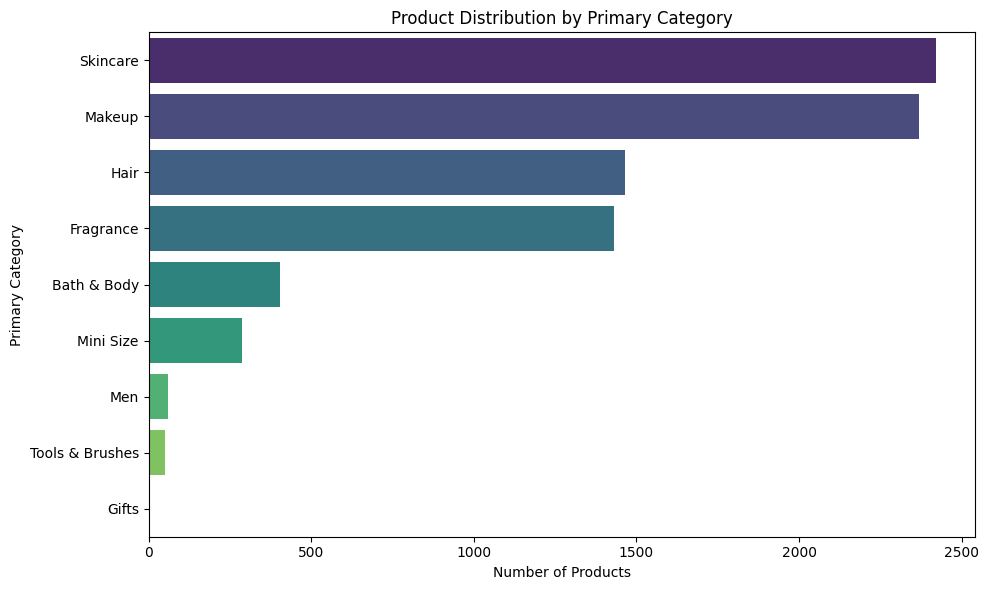

In [12]:
# Calculate the count of products per primary category
primary_category_counts = df_product['primary_category'].value_counts().reset_index()
primary_category_counts.columns = ['primary_category', 'product_count']

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='product_count', y='primary_category', data=primary_category_counts, palette='viridis')
plt.title('Product Distribution by Primary Category')
plt.xlabel('Number of Products')
plt.ylabel('Primary Category')
plt.tight_layout()
plt.show()

#### View Correlation of Loves Counts vs Rating

Correlation Matrix for Selected Columns:


,loves_count,rating,reviews,price_usd,limited_edition,sephora_exclusive
loves_count,1.000000,0.041797,0.683786,-0.089607,-0.069116,0.040512
rating,0.041797,1.000000,0.069801,0.056738,-0.050978,0.018961
reviews,0.683786,0.069801,1.000000,-0.055304,-0.081380,-0.025970
price_usd,-0.089607,0.056738,-0.055304,1.000000,0.046343,-0.140527
limited_edition,-0.069116,-0.050978,-0.081380,0.046343,1.000000,0.066938
sephora_exclusive,0.040512,0.018961,-0.025970,-0.140527,0.066938,1.000000


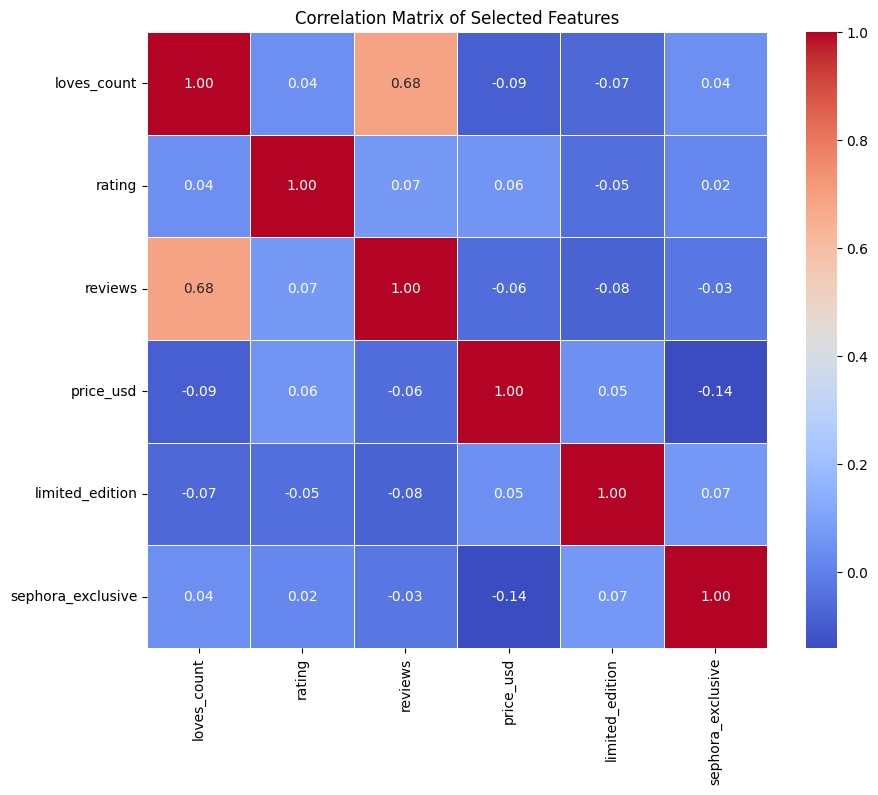

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select the specified columns
selected_columns = ['loves_count', 'rating', 'reviews', 'price_usd', 'limited_edition', 'sephora_exclusive']
correlation_data = df_product[selected_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

print("Correlation Matrix for Selected Columns:")
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

Correlation between rating and reviews: 0.07


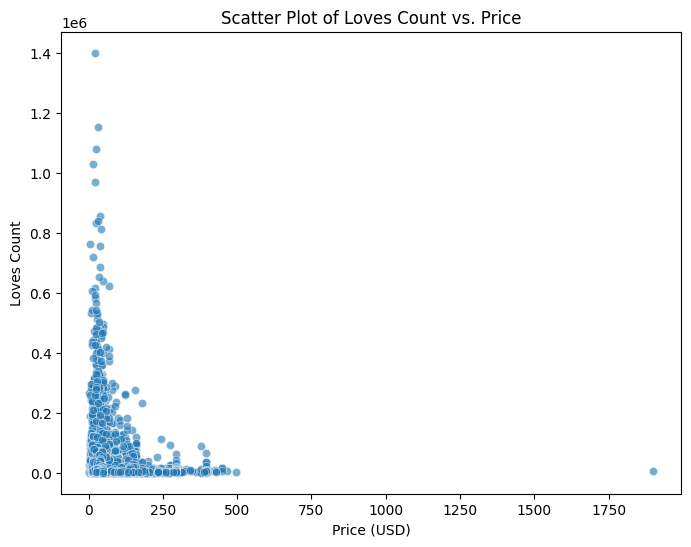

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='price_usd', y='loves_count', data=df_product, alpha=0.6)
plt.title('Scatter Plot of Loves Count vs. Price') # Reverted title
plt.xlabel('Price (USD)') # Reverted x-label
plt.ylabel('Loves Count') # Reverted y-label
plt.show()

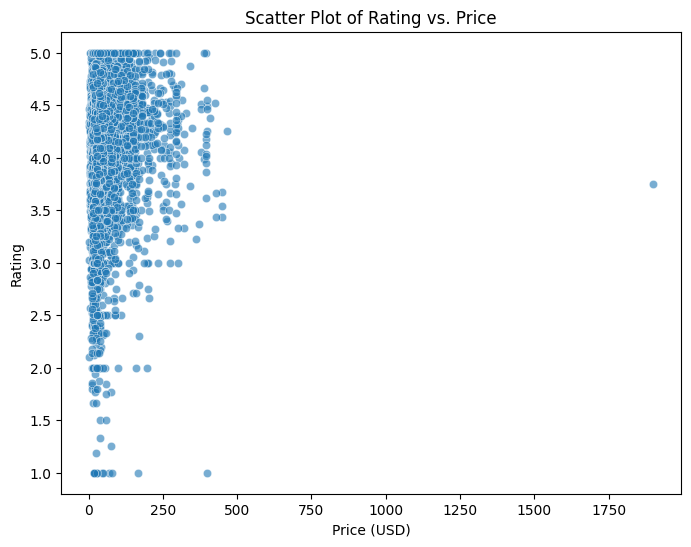

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='price_usd', y='rating', data=df_product, alpha=0.6)
plt.title('Scatter Plot of Rating vs. Price') # Updated title
plt.xlabel('Price (USD)') # Updated x-label
plt.ylabel('Rating') # Updated y-label
plt.show()

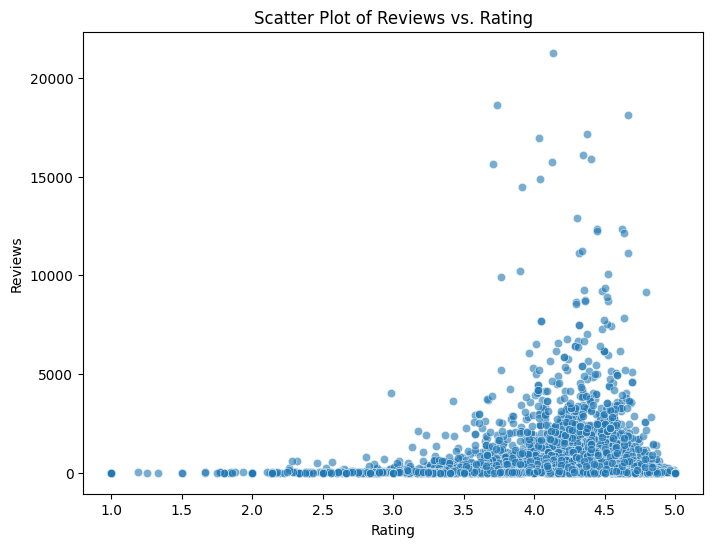

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='rating', y='reviews', data=df_product, alpha=0.6)
plt.title('Scatter Plot of Reviews vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

Correlation between loves_count and rating: 0.04


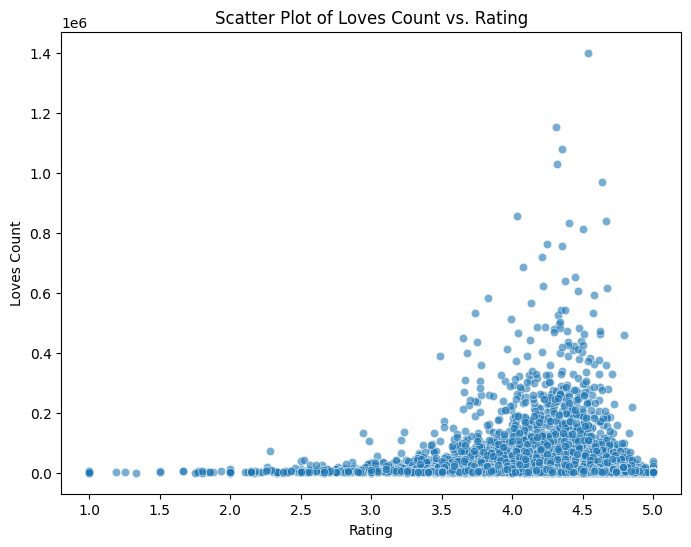

In [22]:
correlation = df_product['loves_count'].corr(df_product['rating'])
print(f"Correlation between loves_count and rating: {correlation:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='rating', y='loves_count', data=df_product, alpha=0.6)
plt.title('Scatter Plot of Loves Count vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Loves Count')
plt.show()

#### View Top Brands base on loves count and ratings combined scoring

In [26]:
import pandas as pd
import numpy as np

# Group by brand and calculate summary stats
brand_summary = df_product.groupby('brand_name').agg(
    avg_rating=('rating', 'mean'),
    total_loves=('loves_count', 'sum'),
    product_count=('product_name', 'count')
).reset_index()

# Optional: log-transform loves_count to reduce skew
brand_summary['log_loves'] = np.log1p(brand_summary['total_loves'])

# Scoring formula: adjust weights as needed
brand_summary['score'] = brand_summary['avg_rating'] * brand_summary['log_loves']

# Sort by score
top_brands = brand_summary.sort_values(by='score', ascending=False)

print(top_brands.head(10))

                      brand_name  avg_rating  total_loves  product_count  \
9        Anastasia Beverly Hills    4.225200      7941142             95   
216  Rare Beauty by Selena Gomez    4.306435      5724687             40   
219           SEPHORA COLLECTION    4.075764     12530142            352   
281           Yves Saint Laurent    4.483329      2753307             65   
64                          Dior    4.223521      6230997            136   
11                 Armani Beauty    4.503826      1947268             56   
255                 The Ordinary    4.107726      7449373             54   
263                  Urban Decay    4.163471      5730058             59   
87       Fenty Beauty by Rihanna    4.028038      9369443             82   
100                  Glow Recipe    4.352207      2771398             29   

     log_loves      score  
9    15.887568  67.128151  
216  15.560299  67.009415  
219  16.343648  66.612848  
281  14.828314  66.480202  
64   15.645047  66.0771

In [7]:
# Binning the loves_count and see the distribution
bins = [0, 5000, 15000, 50000, 200000, 1400000]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df_product['loves_bin'] = pd.cut(df_product['loves_count'], bins=bins, labels=labels)

bin_counts = df_product['loves_bin'].value_counts()
print(bin_counts)

loves_bin
Very Low     2597
Low          2507
Medium       2136
High          957
Very High     205
Name: count, dtype: int64


In [8]:
df_product['loves_bin_qcut'] = pd.qcut(df_product['loves_count'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
print(df_product['loves_bin_qcut'].value_counts())



loves_bin_qcut
Q1    1699
Q2    1699
Q3    1699
Q5    1699
Q4    1698
Name: count, dtype: int64


**Reasoning**:
I have extracted the size value and unit. The next step is to convert the 'oz' unit to 'ml' or 'g' based on common conversions for beauty products (1 oz ≈ 29.57 ml for liquids, 1 oz ≈ 28.35 g for solids/powders), and convert 'fl oz' to 'ml' (1 fl oz ≈ 29.57 ml). Other units like 'sheet' and 'count' will be kept as they are, and 'ml' and 'g' units will remain the same.



## Analyze standardized size

### Subtask:
Analyze the distribution of the standardized size column.


**Reasoning**:
Analyze the distribution of the standardized size column by printing descriptive statistics, creating a histogram, and creating a box plot.



Descriptive statistics for size_ml_g:
count    6651.000000
mean      107.582663
std       198.895779
min         0.005914
25%        14.785000
50%        50.269000
75%       146.371500
max      5204.320000
Name: size_ml_g, dtype: float64


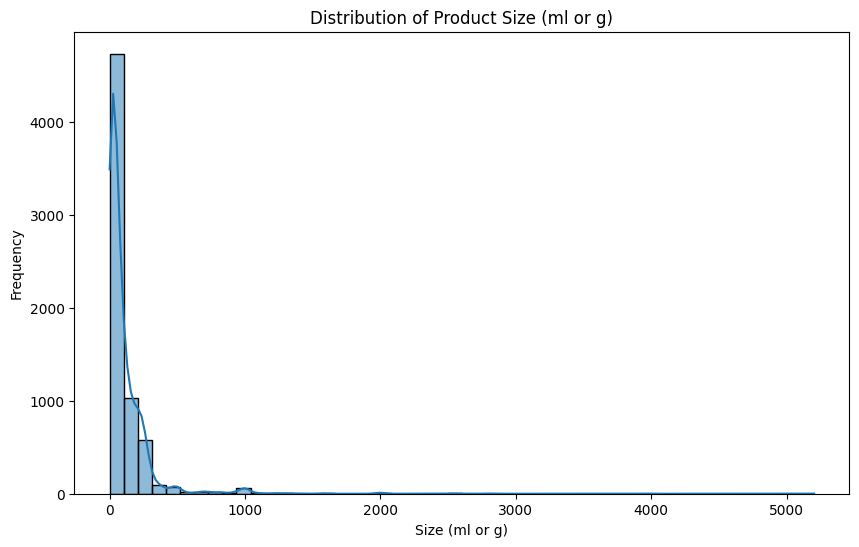

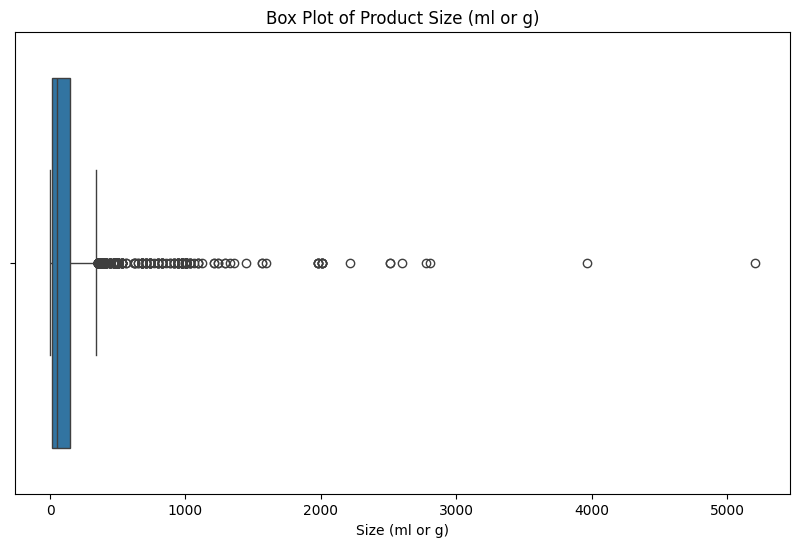

In [51]:
# Print descriptive statistics
print("Descriptive statistics for size_ml_g:")
print(df_product['size_ml_g'].describe())

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_product['size_ml_g'].dropna(), bins=50, kde=True)
plt.title('Distribution of Product Size (ml or g)')
plt.xlabel('Size (ml or g)')
plt.ylabel('Frequency')
plt.show()

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_product['size_ml_g'].dropna())
plt.title('Box Plot of Product Size (ml or g)')
plt.xlabel('Size (ml or g)')
plt.show()

**Reasoning**:
Summarize the distribution of the standardized size column based on the descriptive statistics and plots.



In [53]:
print("Summary of the distribution of standardized product sizes:")
print("The 'size_ml_g' column, representing product sizes in milliliters or grams, has a wide range.")
print(f"The mean size is approximately {df_product['size_ml_g'].mean():.2f} ml/g, while the median is {df_product['size_ml_g'].median():.2f} ml/g.")
print("This difference between the mean and median, along with the long tail to the right in the histogram and the presence of numerous outliers in the box plot, indicates a right-skewed distribution.")
print(f"The majority of products are concentrated in the lower size range (as seen by the 25th percentile at {df_product['size_ml_g'].quantile(0.25):.2f} ml/g and the 75th percentile at {df_product['size_ml_g'].quantile(0.75):.2f} ml/g), but there are significant outliers with very large sizes (up to {df_product['size_ml_g'].max():.2f} ml/g).")
print("These outliers might warrant further investigation or specific handling depending on the analysis goals.")

Summary of the distribution of standardized product sizes:
The 'size_ml_g' column, representing product sizes in milliliters or grams, has a wide range.
The mean size is approximately 107.58 ml/g, while the median is 50.27 ml/g.
This difference between the mean and median, along with the long tail to the right in the histogram and the presence of numerous outliers in the box plot, indicates a right-skewed distribution.
The majority of products are concentrated in the lower size range (as seen by the 25th percentile at 14.79 ml/g and the 75th percentile at 146.37 ml/g), but there are significant outliers with very large sizes (up to 5204.32 ml/g).
These outliers might warrant further investigation or specific handling depending on the analysis goals.


## Summary:

### Data Analysis Key Findings

*   The 'size' column contained a large number of unique values (2055) with various formats and units (oz, mL, g, mg, packs, sheet, count, fl oz).
*   After extracting the size value and unit, the most common units were 'oz', 'fl oz', 'ml', and 'g'.
*   A new column 'size\_ml\_g' was created by converting 'oz' and 'fl oz' to milliliters (using the conversion 1 oz $\approx$ 29.57 ml), and keeping 'g' and 'ml' values as they were.
*   The distribution of the 'size\_ml\_g' column is heavily right-skewed, with a mean of approximately 107.58 ml/g and a median of 50.27 ml/g.
*   A large concentration of products is in the lower size range, with the 25th percentile at 14.79 ml/g and the 75th percentile at 146.37 ml/g.
*   There are significant outliers in the 'size\_ml\_g' column, with values extending up to 5204.32 ml/g.

### Insights or Next Steps

*   Consider handling the identified outliers in the 'size\_ml\_g' column, potentially through capping, transformation, or separate analysis, depending on the goals of future modeling or analysis.
*   Investigate the units that were not converted ('mg', 'packs', 'sheet', 'count') to determine if they can be standardized or should be analyzed separately.


Number of Brands per Primary Category:


,primary_category,brand_count
7,Skincare,143
4,Makeup,115
0,Bath & Body,100
6,Mini Size,90
1,Fragrance,79
3,Hair,68
8,Tools & Brushes,23
5,Men,8
2,Gifts,1


/tmp/ipython-input-1210366822.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='brand_count', y='primary_category', data=brand_count_per_category, palette='viridis')


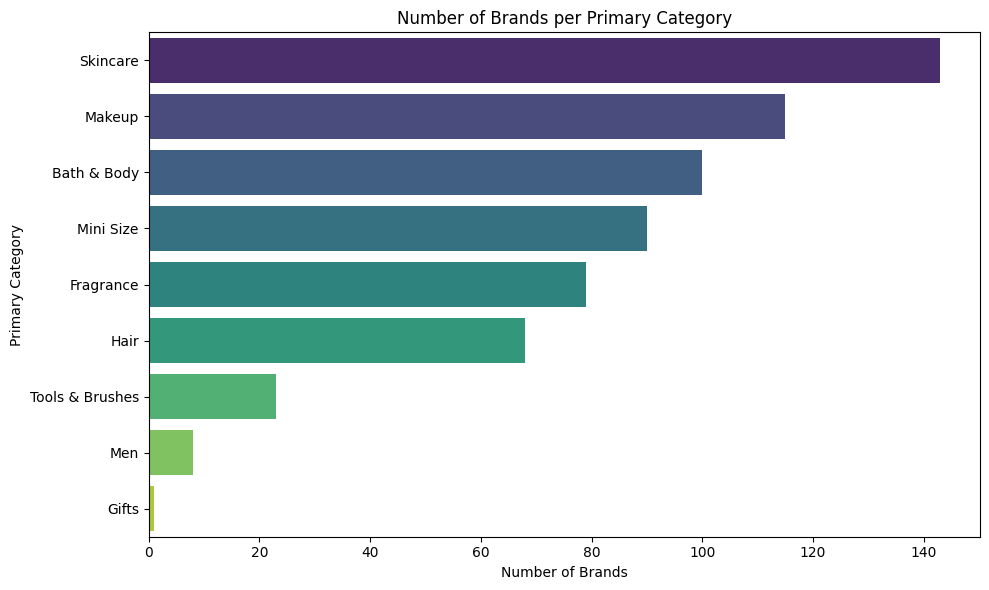

In [23]:
# Group by primary category and count the number of unique brands
brand_count_per_category = df_product.groupby('primary_category')['brand_name'].nunique().reset_index()
brand_count_per_category.columns = ['primary_category', 'brand_count']

# Sort by brand count for better readability
brand_count_per_category = brand_count_per_category.sort_values(by='brand_count', ascending=False)

print("Number of Brands per Primary Category:")
display(brand_count_per_category)

# Optional: Visualize this distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='brand_count', y='primary_category', data=brand_count_per_category, palette='viridis')
plt.title('Number of Brands per Primary Category')
plt.xlabel('Number of Brands')
plt.ylabel('Primary Category')
plt.tight_layout()
plt.show()